# Otto商品分类——SVM

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
dpath = './data/'

train1 = pd.read_csv(dpath + 'Otto_FE_train_org.csv')
train2 = pd.read_csv(dpath + "Otto_FE_train_tfidf.csv")

train2 = train2.drop(['id', 'target'], axis=1)

train = pd.concat([train1, train2], axis=1)
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,1,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.075886,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,4,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,...,0.460983,0.000000,0.008244,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.124622,0.000000,0.000000,0.0,0.0,0.145988,0.0,0.0,0.0


In [3]:
del train1
del train2

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 188 entries, id to feat_93_tfidf
dtypes: float64(186), int64(1), object(1)
memory usage: 88.8+ MB


In [5]:
# train = train.sample(n=15000, random_state=66, axis=0)  # pandas.DataFrame.sample 随机选取若干行

# y = train['target']
# X = train.drop(['id', 'target'], axis=1)

# feat_names = X.columns

# from scipy.sparse import csr_matrix

# X = csr_matrix(X)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=5000, random_state=66)
# X_train = pd.DataFrame(data=X_train.toarray(), columns=feat_names)
# X_train

In [6]:
y = train['target']
X = train.drop(['id', 'target'], axis=1)

feat_names = X.columns

from scipy.sparse import csr_matrix

X = csr_matrix(X)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1000, train_size=1000, random_state=66)

X_train = pd.DataFrame(data=X_train.toarray(), columns=feat_names)
X_train

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.000000,0.000000,0.031250,0.057143,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.034568,0.000000,0.0,0.0,0.140113,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013158,0.00000,0.000000,...,0.0,0.000000,0.081344,0.110785,0.089334,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013158,0.00000,0.000000,...,0.0,0.727870,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013158,0.27907,0.000000,...,0.0,0.000000,0.000000,0.000000,0.051291,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013158,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.216867,0.319967,0.000000,0.878488,0.000000,0.0,0.0,0.000000,0.0
996,0.000000,0.039216,0.015625,0.042857,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.095886,0.0,0.0,0.000000,0.0
997,0.016393,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.288871,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
998,0.000000,0.000000,0.000000,0.014286,0.052632,0.0,0.0,0.013158,0.00000,0.066667,...,0.0,0.000000,0.401083,0.000000,0.220239,0.000000,0.0,0.0,0.000000,0.0


In [8]:
X_val = pd.DataFrame(data=X_val.toarray(), columns=feat_names)
X_val

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.013158,0.000000,0.000000,...,0.0,0.000000,0.056377,0.000000,0.061914,0.000000,0.0,0.000000,0.000000,0.0
1,0.04918,0.0,0.00000,0.000000,0.0,0.0,0.0,0.184211,0.023256,0.000000,...,0.0,0.000000,0.024661,0.201523,0.027084,0.150148,0.0,0.182952,0.036593,0.0
2,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.046512,0.000000,...,0.0,0.000000,0.304520,0.103684,0.250823,0.000000,0.0,0.000000,0.000000,0.0
3,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.113359,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.147842,0.000000,0.324727,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.482016,0.000000,0.132340,0.000000,0.0,0.000000,0.000000,0.0
996,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.023256,0.000000,...,0.0,0.449364,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
997,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.198748,0.000000,0.000000,0.000000,0.0,0.000000,0.098301,0.0
998,0.00000,0.0,0.09375,0.285714,0.0,0.0,0.0,0.000000,0.023256,0.066667,...,0.0,0.000000,0.000000,0.000000,0.023695,0.065679,0.0,0.000000,0.064027,0.0


In [9]:
y_train.shape, y_val.shape

((1000,), (1000,))

### 默认参数的 LinearSVC

In [10]:
lsvc1 = LinearSVC()
lsvc1.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [11]:
y_predict = lsvc1.predict(X_val)
y_predict[:5]

array(['Class_2', 'Class_9', 'Class_3', 'Class_5', 'Class_2'],
      dtype=object)

In [12]:
#accuracy_score(y_val, y_predict)
print('准确率为：', lsvc1.score(X_val, y_val), '\n')

print("Classification report for classifier %s:\n%s\n" % (lsvc1, classification_report(y_val, y_predict)))

print("Confusion matrix:\n%s" % confusion_matrix(y_val, y_predict))

准确率为： 0.727 

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

     Class_1       0.40      0.18      0.24        34
     Class_2       0.61      0.88      0.73       242
     Class_3       0.42      0.15      0.22        98
     Class_4       0.78      0.10      0.18        67
     Class_5       0.88      0.96      0.92        47
     Class_6       0.90      0.92      0.91       235
     Class_7       0.53      0.52      0.53        44
     Class_8       0.78      0.87      0.82       140
     Class_9       0.76      0.84      0.80        93

    accuracy                           0.73      1000
   macro avg       0.68      0.60      0.60      1000
weighted avg       0.71      0.73      0.69      1000


Confusion ma

In [13]:
cross_val_score(lsvc1, X_train, y_train, cv=3).mean()

0.7180024335712959

### LinearSVC正则参数调优
LinearSVC 需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1）

In [35]:
C_s = np.logspace(-3, 1, 5)
penalty_s = ['l1','l2']
param_grid = dict(penalty = penalty_s, C = C_s)

In [36]:
lsvc2 = LinearSVC(dual=False)
grid = GridSearchCV(lsvc2, param_grid, cv=3, n_jobs=4, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=4,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [37]:
grid.best_estimator_

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [38]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [39]:
grid.best_score_

0.7219884555213896

In [40]:
grid.cv_results_

{'mean_fit_time': array([0.01595672, 0.02526617, 0.01595648, 0.03091757, 0.02493294,
        0.03723399, 0.23138587, 0.04122265, 0.84841466, 0.05219301]),
 'std_fit_time': array([4.49566384e-07, 2.04947307e-03, 8.14101394e-04, 1.41012124e-03,
        8.14296062e-04, 9.40155781e-04, 1.42675437e-02, 4.69797033e-04,
        5.64250883e-02, 3.08295231e-03]),
 'mean_score_time': array([0.00365806, 0.00299231, 0.00299231, 0.00299215, 0.00299207,
        0.00299207, 0.00299207, 0.00265972, 0.00266981, 0.00266043]),
 'std_score_time': array([4.71033179e-04, 8.99132768e-07, 5.94720425e-07, 8.92080638e-07,
        4.49566384e-07, 6.83651389e-07, 4.05233662e-07, 4.70639899e-04,
        4.77939087e-04, 4.69965469e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10.0,
                    10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_p

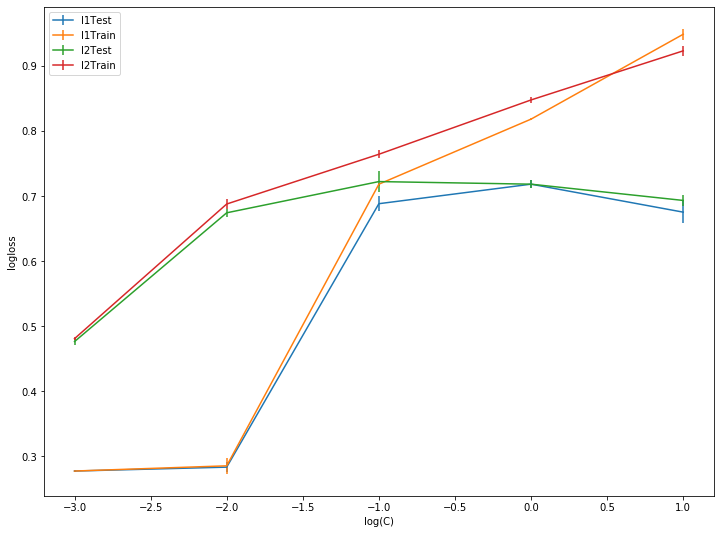

In [41]:
mean_test_score = grid.cv_results_['mean_test_score']
std_test_score = grid.cv_results_['std_test_score']

mean_train_score = grid.cv_results_['mean_train_score']
std_train_score = grid.cv_results_['std_train_score']

n_Cs = len(C_s)
n_penaltys = len(penalty_s)

test_scores = mean_test_score.reshape(n_Cs, n_penaltys)
train_scores = mean_train_score.reshape(n_Cs, n_penaltys)
test_stds = std_test_score.reshape(n_Cs, n_penaltys)
train_stds = std_train_score.reshape(n_Cs, n_penaltys)

plt.figure(figsize=(12, 9))

x_axis = np.log10(C_s)
for i in range(n_penaltys):
    plt.errorbar(x_axis, test_scores[:, i], yerr=test_stds[:, i], label=penalty_s[i] + 'Test')
    plt.errorbar(x_axis, train_scores[:, i], yerr=train_stds[:, i], label=penalty_s[i] + 'Train')
    
plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('accuracy')
plt.axis()
plt.show()

### SVC正则参数调优

In [48]:
param_grid=[
    {'C':[0.1,1,10,100,1000],'kernel':['linear']}, 
    {'C':[0.1,1,10,100,1000],'gamma':[0.1,1,10],'kernel':['rbf']}
]

svc = SVC(cache_size=2000)

grid = GridSearchCV(svc, param_grid, cv=3, n_jobs=4, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=2000,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [49]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [50]:
grid.best_score_

0.7369884854914796

In [51]:
grid.cv_results_

{'mean_fit_time': array([0.16655548, 0.11602306, 0.10239188, 0.13045454, 0.19048913,
        0.22306951, 0.23670046, 0.3587184 , 0.16489251, 0.2127734 ,
        0.36602036, 0.12666567, 0.22340194, 0.36901259, 0.12034472,
        0.22539703, 0.36869987, 0.12998692, 0.22573924, 0.36107119]),
 'std_fit_time': array([0.00373204, 0.00375984, 0.00169523, 0.00936795, 0.00959989,
        0.0033902 , 0.00248716, 0.00366538, 0.00490875, 0.00515849,
        0.00430867, 0.00082063, 0.00215413, 0.00282114, 0.00124384,
        0.00215542, 0.00309918, 0.00124422, 0.0026315 , 0.00160771]),
 'mean_score_time': array([0.0611786 , 0.05186081, 0.04924734, 0.04654344, 0.04886953,
        0.07446845, 0.06881523, 0.07580288, 0.06083719, 0.06747683,
        0.07612991, 0.05552419, 0.06549239, 0.07745949, 0.05518659,
        0.06615527, 0.0754559 , 0.05551791, 0.06581378, 0.07346042]),
 'std_score_time': array([1.68353010e-03, 1.62810545e-03, 4.41446419e-04, 9.40661710e-04,
        8.13614718e-04, 1.24383659e-

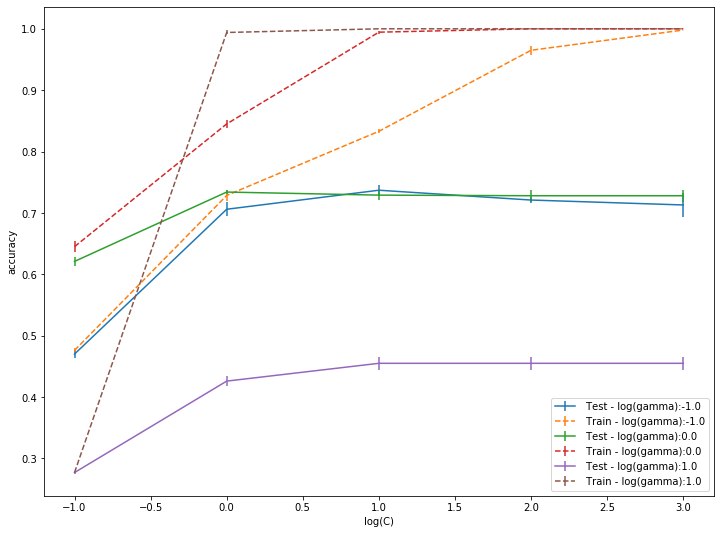

In [72]:
mean_test_score = grid.cv_results_['mean_test_score']
std_test_score = grid.cv_results_['std_test_score']

mean_train_score = grid.cv_results_['mean_train_score']
std_train_score = grid.cv_results_['std_train_score']

n_Cs = len([0.1,1,10,100,1000])
gammas = [0.1,1,10]
n_gammas = len(gammas)

test_scores = mean_test_score[5:].reshape(n_Cs, n_gammas)
train_scores = mean_train_score[5:].reshape(n_Cs, n_gammas)
test_stds = std_test_score[5:].reshape(n_Cs, n_gammas)
train_stds = std_train_score[5:].reshape(n_Cs, n_gammas)

plt.figure(figsize=(12, 9))

x_axis = np.log10([0.1,1,10,100,1000])
for i in range(3):
    plt.errorbar(x_axis, test_scores[:, i], yerr=test_stds[:, i], label=' Test - log(gamma):' + str(np.log10(gammas[i])))  
    plt.errorbar(x_axis, train_scores[:, i], yerr=train_stds[:, i], linestyle='--', label=' Train - log(gamma):' + str(np.log10(gammas[i]))) 
    
plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('accuracy')
plt.axis()
plt.show()